 #                                            Часть 1.Приоритизация гипотез.


###  Цель: применить различные фреймворки для приоретизации гипотез, чтобы понять на какие именно цели рациональнее всего тратить ресурсы компании.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data = data.rename(columns = {'Hypothesis':'hypothesis',   #приведем названия столбцов к более удобному виду
                              'Reach':'reach',
                              'Impact':'impact',
                              'Confidence':'confidence',
                              'Efforts':'efforts'})

Применим фреймворк ICE для приоритизации гипотез, отсортируем результат по убыванию приоритета:

In [5]:
 pd.options.display.max_colwidth = 100
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']

In [6]:
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применим фреймворк RICE для приоритизации гипотез, отсортируем результат по убыванию приоритета:

In [7]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

In [8]:

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


# Вывод по приоритетам гипотез
В нашем случае наиболее подходящий фреймворк для приоритизации гипотез является фреймворк RICE, так как этот фреймворк учитывает охват гипотезы. Поэтому наиболее перспективные гипотезы будут следующие:

1)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2)Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
При этом гипотеза с добавление формы подписки имеет рейтинг в два раза больше, чем гипотеза с добавлением блоков с рекомендациями товаров, за счет высоких показателей охвата изменений, влияния и уверенности при средний расходах на внедрение.

# Часть 2. Анализ A/B-теста

Цель: проанализировать А/В тест: опеределить, каким образом поменялись различные метрики при внедрении новой "фичи"

# Предобработка данных

Откроем датафрейм с заказами

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
display(orders.head(10))  #проведем предварительный осмотр данных

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date']) #приведем стобец с датой к нужному типу

In [13]:
orders['group'].value_counts()  #количество пользователей в группах довольно существенно разлчиается

B    640
A    557
Name: group, dtype: int64

In [14]:
orders.isna().sum() #явных пропусков не обнаружено

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Посмотрим на датафрейм с посещениями

In [15]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [16]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors['date'].value_counts()  #посмотрим на даты проведения А/B теста

2019-08-27    2
2019-08-09    2
2019-08-14    2
2019-08-31    2
2019-08-11    2
2019-08-03    2
2019-08-19    2
2019-08-07    2
2019-08-18    2
2019-08-08    2
2019-08-01    2
2019-08-29    2
2019-08-28    2
2019-08-22    2
2019-08-15    2
2019-08-23    2
2019-08-21    2
2019-08-13    2
2019-08-04    2
2019-08-05    2
2019-08-24    2
2019-08-20    2
2019-08-26    2
2019-08-17    2
2019-08-02    2
2019-08-12    2
2019-08-25    2
2019-08-16    2
2019-08-06    2
2019-08-10    2
2019-08-30    2
Name: date, dtype: int64

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [20]:
display(orders)
display(visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Переименуем навазния стобцоы для удобства:

In [21]:
orders = orders.rename(columns={'transactionId':'orderId',
                              'visitorId':'userId'})

In [22]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


## Построим график кумулятивной выручки по группам

In [23]:
# Необходимые библиотеки для исследования.
import pandas as pd                             # для анализа данных
import numpy as np                              # для математических вычислений

import seaborn as sns                           # для визуализации данных
from matplotlib import pyplot as plt            # для визуализации данных
%matplotlib inline

import datetime as dt                           # для преобразования к типу данных
from datetime import datetime      
import scipy.stats as stats                     # для высокоуровневых математических вычислений
from scipy import stats as st  
import math

import warnings                                 # для предупреждений в программе 
warnings.filterwarnings('ignore')               # фильтр предупреждений

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): /

In [24]:
datesGroups = orders[['date','group']].drop_duplicates() 

Объявим переменную orders_aggregated, содержащую:

дату;
группу A/B-теста;
число уникальных заказов в группе теста по указанную дату включительно;
число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
суммарную выручку заказов в группе теста по указанную дату включительно

In [25]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [26]:
display(ordersAggregated)

,date,group,orderId,userId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Объявим переменную visitors_aggregated, содержащую:

дату;
группу A/B-теста;
количество уникальных посетителей в группе теста по указанную дату включительно

In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


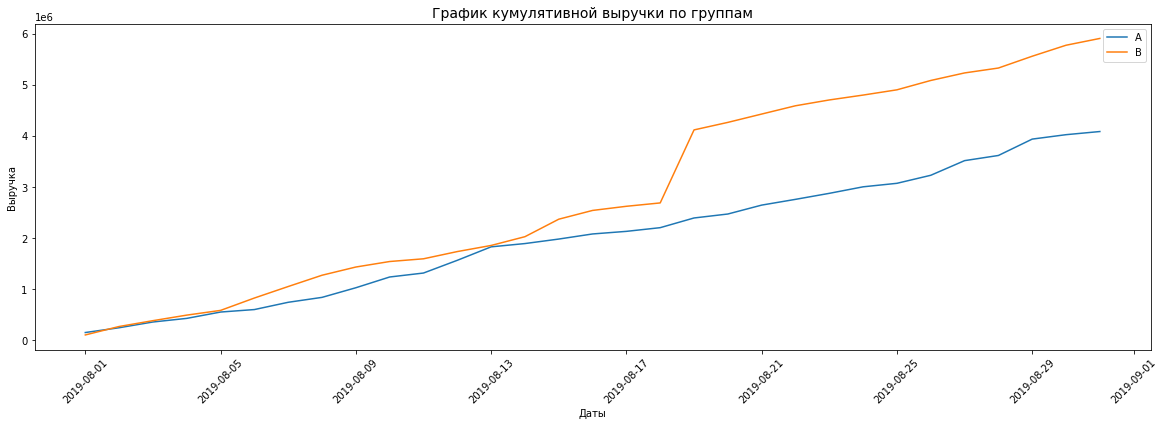

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend()
plt.show()

С самого начала теста увеличение выручки сегментов шло равномерно с небольшим перевесом сторону сегмента В до момента резкого скачка выручки сегмента В 2019-08-18.

Это может быть вызвано аномальными значениями, которые влияют на результаты.

## Построим график кумулятивного среднего чека по группам. 

Разделим кумулятивную выручку на кумулятивное число заказов:

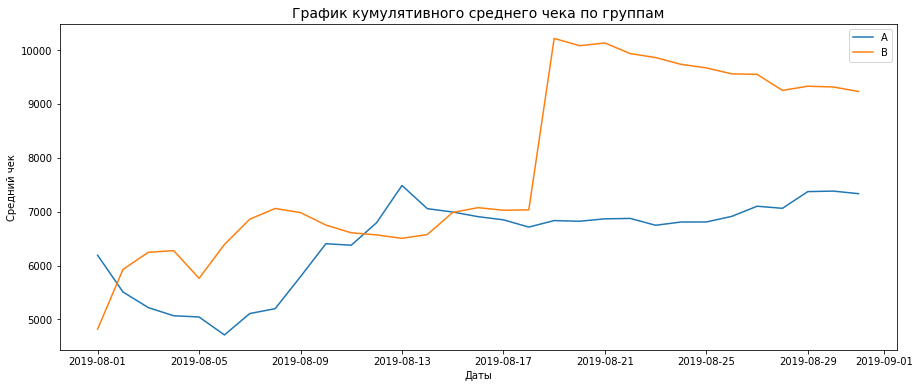

In [30]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Средний чек")
plt.legend() 

Кумулятивное значение среднего чека сегмента В сильно также выросло 2019-08-18 после чего наблюдается небольшое снижение.

Скорее всего, принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, которые могут сильно искажать результаты.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A

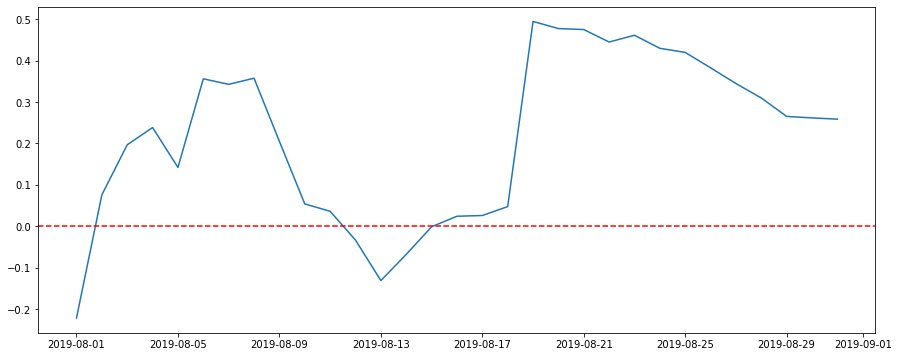

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет». Где-то могли спрятаться крупные заказы и выбросы, найдем их позже.

## Построим график кумулятивного среднего количества заказов на посетителя по группам

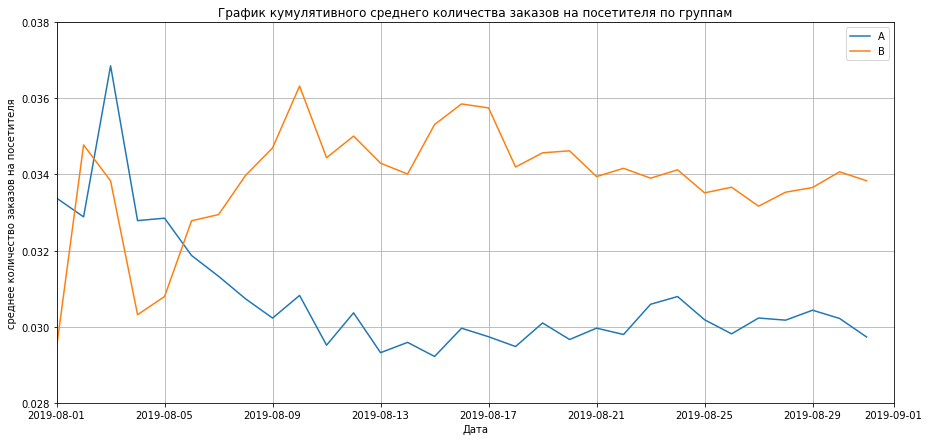

In [32]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

В начале теста данный показатель был выше для группы А, но затем группа В "обогнала" группу А и зафиксировала отрыв до конца теста.

In [33]:
display(cumulativeData)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


## Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

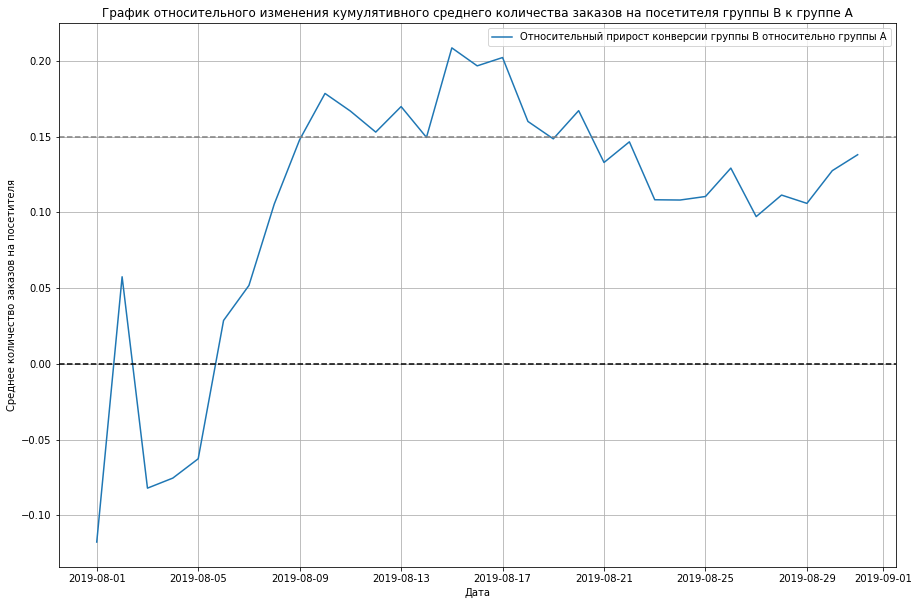

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
# добавляем оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()


По графику видно, что группа B выходит вперед после 5-го дня теста и лидирует с преимуществом примерно 15% до конца теста.

## Построим точечный график количества заказов по пользователям.

In [35]:
display(orders)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


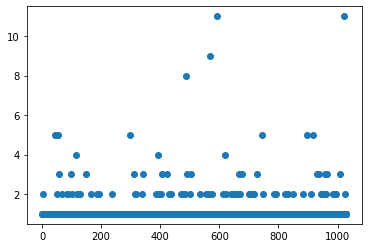

In [36]:
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : 'nunique'})
orders_per_user.columns = ['userId','orders']

print(orders_per_user.sort_values(by='orders',ascending=False).head())


x_values = pd.Series(range(0,len(orders_per_user)))
plt.scatter(x_values, orders_per_user['orders']);

Исходя из графика, вполне можем сказать, что пользователей, которые совершают более двух заказов очень мало, они вполне могут быть выбросами, чтобы сказать точнее, посмотрим на перцентили.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя, чтобы выбрать  границу для определения аномальных пользователей.

In [37]:
print(np.percentile(orders_per_user['orders'], [ 95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырёх заказов. Все, что за 99 перцентилем — аномально.

Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Построим точечный график стоимостей заказов. 

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

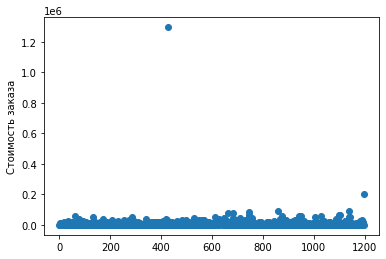

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'])

orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

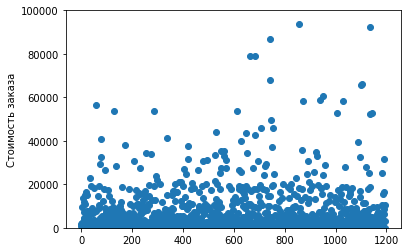

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue']) ;
plt.ylim(0, 100000)
orders['revenue'].describe()

На взгляд предварительно можно сказать, что заказов дороже 50 000 очень мало. Но лучше в дополнение взглянуть на перцентили.

## Посчитаем 95-й и 99-й перцентили стоимости заказов

In [40]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[28000.  58233.2]


Не более 5 % заказов на сумму 28000, не более 1 % - 58233.2. Все, что за 95 перцентилем — аномально.

Границу для определения аномальных заказов, выберем 28 000 рублей

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [41]:
orders = orders.rename(columns = {'orderId':'order_id',
                                 'userId':'user_id'})

In [42]:
# Изучим код и устройство таблицы data.
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'order_id', 'user_id', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'order_id', 'user_id', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                   .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                   .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head())

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [43]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userid', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

In [44]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [45]:
# Посчитаем статистическую значимость различия конверсии. Применим тест Манна-Уитни.
# Выведем p-value для сравнения конверсии между группами. Округлим p-value до 3 знаков после запятой. 
# Вычислим и выведем относительное различие в конверсии между группами. Округлим до 3 знаков после запятой.
print("p-value нулевой гипотезы о равенстве конверсий в группах А и В: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value нулевой гипотезы о равенстве конверсий в группах А и В: 0.017
Относительный прирост конверсии группы B по отношению к группе A: 0.138


Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Нет статистически значимых различий по конверсии между группами А и В по «сырым» данным

Альтернативная гипотеза H₁: Есть статистически значимое различие по конверсии между группами А и В по «сырым» данным

In [46]:
# Выполним проверку гипотезы.

alpha = 0.05 # критический уровень статистической значимости для формулирования двусторонних гипотез
results = stats.mannwhitneyu(sampleA, sampleB)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.016792355056752608
Отвергаем нулевую гипотезу


Выводы

Первое число p-value = 0.016 меньше 0,05. Анализ «сырых» данных сообщает, что в конверсии между группами есть статистически значимые различия в конверсии между группами.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [47]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами,
# передадим критерию mannwhitneyu() данные о выручке с заказов.
print("p-value нулевой гипотезы о равенстве среднего чека в группах А и В: {0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value нулевой гипотезы о равенстве среднего чека в группах А и В: 0.729
Относительное изменение среднего чека в группе B по отношению группы A: 0.259


Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Нет статистически значимых различий в среднем чеке между группами А и В по «сырым» данным

Альтернативная гипотеза H₁: Есть статистически значимое различие в среднем чеке между группами А и В по «сырым» данным

In [48]:
# Выполним проверку гипотезы.

alpha = 0.05 # критический уровень статистической значимости для формулирования двусторонних гипотез
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу


Выводы P-value = 0.729  больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть, статистически значимых различий в среднем чеке между группами нет.

 Средний чек группы B равен среднему чеку группы A (или не отличается или различия получены случайным образом) и он не может быть значительно выше среднего чека группы A.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Приступаем к подготовке очищенных от аномалий данных.

95-й и 99-й перцентили средних чеков равны 28 тыс и 58,233 тыс у.е.

95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто потратил более 30 тыс, либо совершил 4 и более заказов.

Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

In [49]:
display(ordersByUsersA)

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['user_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. Выведем p-value для сравнения среднего между очищенными группами. Округлим p-value до трех знаков после запятой. Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Нет статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Альтернативная гипотеза H₁: Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.019
Относительные различия: 0.144


Как и в случае с сырым данными, статистическая значимость достигнута. 

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным

Альтернативная гипотеза H₁: Есть статистически значимое различие в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.979
Относительные различия: -0.017


Значение p-value стало больше с 0.729 до 0.979, однако относительные различия уменьшились с 26% до 1,7%. Это означает, что в данных стало меньше шума.

# ВЫВОД
Имеющиеся факты:

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным и по "сырым данным".

Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A на примерно 15%.

График различия среднего чека говорит о том, что результаты группы B лучше группы А примерно на 20%.

На основании фактов можно сделать вывод: Остановить тест, так как группа B превосходит группу А.